# Importing and loading dataset

In [2]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from __future__ import print_function
import os  # for os.path.basename
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.manifold import MDS
import os  # for os.path.basename
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.manifold import MDS

# Performing K Mean Algorithm

In [4]:
fb_df = pd.read_csv("labelled_ycombi_v2.csv")
#performoing some initial data transformation
titles = list(fb_df['processed_post'])
topic  = list(fb_df['topic'])
sentiment  = list(fb_df['sentiment'])
frame['sentiments'] = 'neg'
frame.loc[frame['sentiment'] > 0.2, 'sentiments'] = 'pos'
sentiments = list(frame['sentiments'])
#titles = titles[:1000]
ranks = []
for i in range(0,len(titles)):
    ranks.append(i)
    
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, ngram_range=(1,3))
%time tfidf_matrix = tfidf_vectorizer.fit_transform(titles)
terms = tfidf_vectorizer.get_feature_names()
dist = 1 - cosine_similarity(tfidf_matrix)

#Performing cluster analysis
num_clusters = 2
km = KMeans(n_clusters=num_clusters)
%time km.fit(tfidf_matrix)
clusters = km.labels_.tolist()
films = { 'title': titles, 'rank': ranks, 'synopsis': titles, 'cluster': clusters,'sentiment':sentiment,'topic':topic }
frame = pd.DataFrame(films, index = [clusters] , columns = ['rank', 'title', 'cluster','sentiment','topic'])
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    for ind in order_centroids[i, :20]:
        print(' %s' % terms[ind].encode('utf-8', 'ignore'), end=',')
    print('\n')

Wall time: 754 ms
Wall time: 949 ms
Cluster 0 words: b'x2f', b'x2f x2f', b'x27', b'com', b'http', b'http x2f', b'http x2f x2f', b'nofollow http x2f', b'quot', b'rel nofollow http', b'nofollow http', b'nofollow', b'rel nofollow', b'href', b'rel', b'use', b'facebook', b'twitter', b'code', b'like',

Cluster 1 words: b'x27', b'facebook', b'twitter', b'use', b'quot', b'app', b'like', b'work', b'peopl', b'make', b'user', b'develop', b'servic', b'need', b'data', b'time', b'way', b'want', b'thing', b'googl',



(array([ 5.,  7., 27., 43., 30., 17.,  3.,  2.,  3.,  1.]),
 array([-0.225 , -0.1425, -0.06  ,  0.0225,  0.105 ,  0.1875,  0.27  ,
         0.3525,  0.435 ,  0.5175,  0.6   ]),
 <a list of 10 Patch objects>)

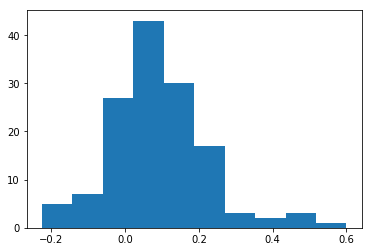

In [5]:
plt.hist(frame[frame['cluster'] == 0]['sentiment'])

(array([  2.,   0.,   7.,  16.,  54., 228., 168.,  45.,   9.,   3.]),
 array([-0.8 , -0.65, -0.5 , -0.35, -0.2 , -0.05,  0.1 ,  0.25,  0.4 ,
         0.55,  0.7 ]),
 <a list of 10 Patch objects>)

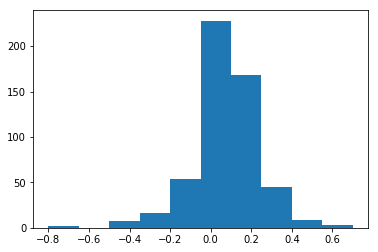

In [6]:
plt.hist(frame[frame['cluster'] == 1]['sentiment'])

# Multi-dimensional modelling

In [8]:

#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

MDS()

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

Plotting Cluster 


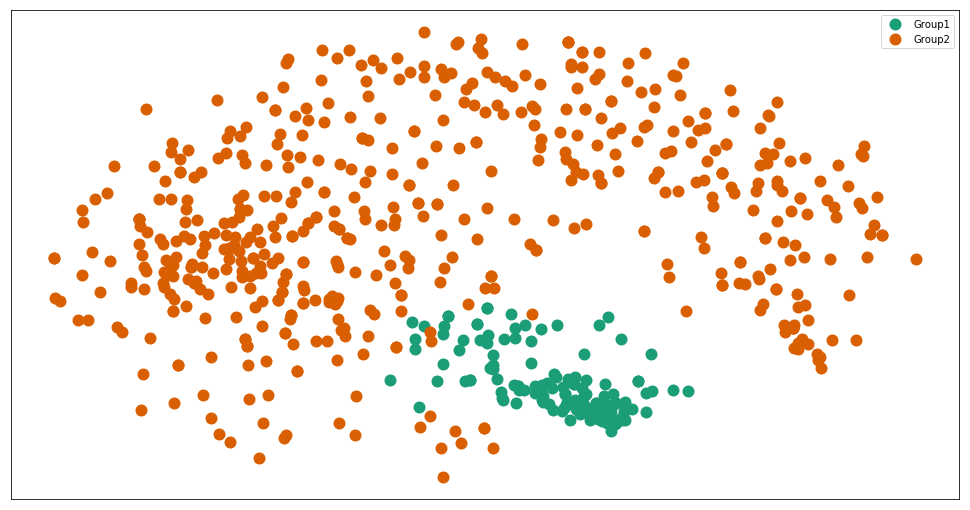

Plotting API\s 


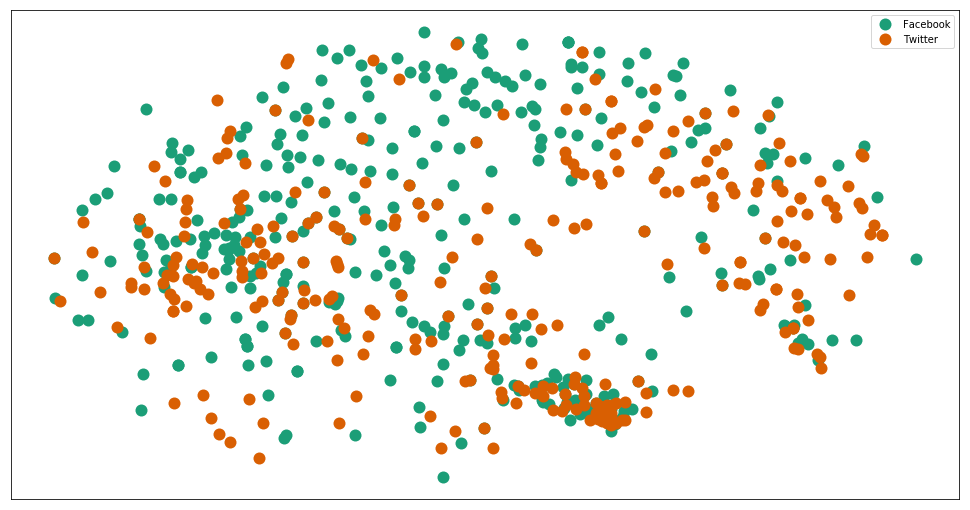

Plotting Sentiment 


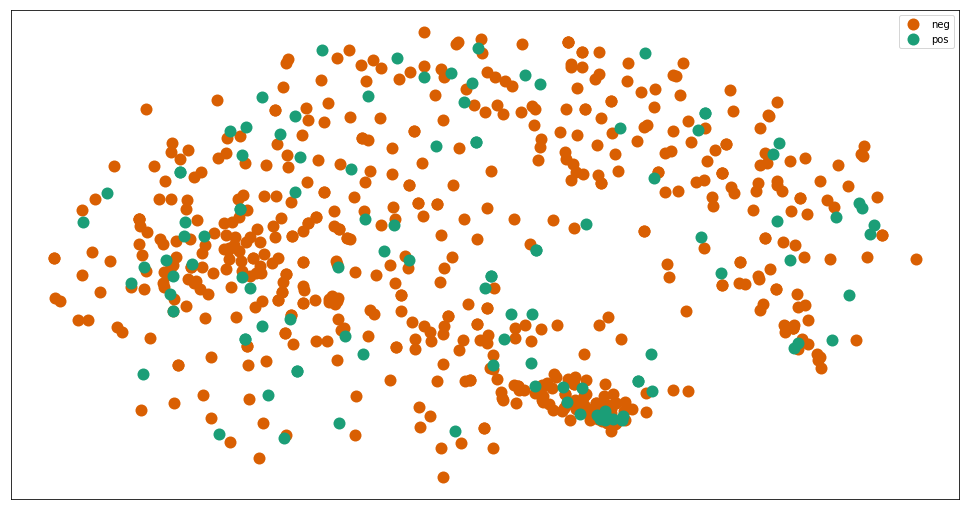

In [10]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'Group1', 
                 1: 'Group2',2: 'Group2', 
                 3: 'Group3'}

%matplotlib inline

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters)) 

#group by cluster
groups = df.groupby('label')

print("Plotting Cluster ")
# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point


    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

plt.close()




print("Plotting API\s ")
cluster_colors = {'Facebook': '#1b9e77', 'Twitter': '#d95f02'}
cluster_names = {'Facebook': 'Facebook', 
                 'Twitter': 'Twitter'}

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=topic)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point


    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

plt.close()





print("Plotting Sentiment ")
cluster_colors = {'pos': '#1b9e77', 'neg': '#d95f02'}
cluster_names = {'pos': 'pos', 
                 'neg': 'neg'}

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=sentiments)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point


    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

plt.close()